In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re


In [6]:
cust_acq = pd.read_csv("D:\DATA SC\python\Analytix lab assignments\Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
cust_acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [7]:
cust_acq.describe()

,No,Age,Limit
count,100.000000,100.000000,100.000000
mean,50.500000,46.490000,284700.610000
std,29.011492,18.282572,218494.967852
min,1.000000,12.000000,10000.000000
25%,25.750000,33.750000,100000.000000
50%,50.500000,46.500000,300001.500000
75%,75.250000,60.250000,500000.000000
max,100.000000,79.000000,500000.000000


In [8]:
cust_acq.loc[cust_acq['Age']<18]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [9]:
cust_acq.loc[cust_acq.Age<18,'Age']=46.9


In [10]:
spend= pd.read_csv('D:\DATA SC\python\Analytix lab assignments\Python Foundation Case Study 2 - Credit Card Case Study/spend.csv')
repay = pd.read_csv('D:\DATA SC\python\Analytix lab assignments\Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv')


In [11]:
repay.dropna(axis=1,how='all',inplace=True)
repay.dropna(axis=0,how='all',inplace=True)
repay

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [12]:
cust_spend = pd.merge(cust_acq,spend,how= 'outer', on=['Customer'])
cust_spend.rename(columns= {'Month':'spend_mon','Amount':'spend_amount'},inplace= True)
cust_spend.drop(['Sl No:'],axis=1,inplace=True)
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,spend_mon,Type,spend_amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [13]:
repay.head(1)

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75


In [14]:
repay_limit= pd.merge(repay,cust_acq,how='left',on=['Customer'])
repay_limit

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497.0,A68,10-May-06,319836.49,68,46.9,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,11-Jul-06,247628.45,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,12-Aug-05,454016.51,70,46.9,BOMBAY,Platimum,10001.0,C32,Self Employed


In [15]:
### Caping spend amount to 50% of the Limit :


cust_spend.loc[cust_spend['spend_amount']>cust_spend['Limit'],'spend_amount']=(50*cust_spend['Limit']).div(100)
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,spend_mon,Type,spend_amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


In [16]:
## Caping the repayment amount to limit

repay_limit.loc[repay_limit['Amount']>repay_limit['Limit'],'Amount']=repay_limit['Limit']
repay_limit

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497.0,A68,10-May-06,100000.00,68,46.9,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,11-Jul-06,10000.00,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,12-Aug-05,10001.00,70,46.9,BOMBAY,Platimum,10001.0,C32,Self Employed


In [17]:
### Disctinct Customer Count

cust_acq['Customer'].nunique()

100

### Q. 2(b) Distinct Catagories Determination 

In [18]:
### Disctinct Employment Catagories Count -

cust_acq['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [19]:
### Distinct Spending Catagories -

cust_spend['Type'].value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
MOVIE TICKET     76
RENTAL           76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

### Avg Monthly Spend

In [20]:
cust_spend['spend_mon']=pd.to_datetime(cust_spend['spend_mon'])
cust_spend['Tran_Month']= cust_spend['spend_mon'].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
cust_spend['Tran_yr']= cust_spend['spend_mon'].apply(lambda x: pd.Timestamp.strftime(x,format='%Y'))
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,spend_mon,Type,spend_amount,Tran_Month,Tran_yr
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,January,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,January,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,January,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,January,2004


In [21]:
### Monthwise Transaction AVG.

cust_wise_tran_count = cust_spend.pivot_table(index=['Customer','Tran_yr','Tran_Month'],values='spend_amount',aggfunc='mean')
cust_wise_tran_count

spend_amount
Customer Tran_yr Tran_Month               
A1       2004    February     52208.650000
                 January     373274.006667
                 May         361141.310000
         2005    August      344372.100000
                 February    205992.450000
...                                    ...
A95      2004    January     240401.500000
A96      2004    January      54729.660000
A97      2004    January       5000.000000
A98      2004    January       5000.500000
A99      2004    January       5001.000000

[807 rows x 1 columns]

In [22]:
### now the Spend avg will be Customer wise Monthly avg in a perticular year.
cust_wise_monthly_spend_avg = cust_wise_tran_count.pivot_table(index=['Customer','Tran_yr'],values='spend_amount',aggfunc='mean')
cust_wise_monthly_spend_avg

spend_amount
Customer Tran_yr               
A1       2004     262207.988889
         2005     275974.557500
         2006     253091.965000
A10      2004     149469.538889
         2005     302552.215833
...                         ...
A95      2004     240401.500000
A96      2004      54729.660000
A97      2004       5000.000000
A98      2004       5000.500000
A99      2004       5001.000000

[233 rows x 1 columns]

In [23]:
## now the mean of the customer wise monthly avg will be 

cust_wise_monthly_avg= cust_wise_monthly_spend_avg.pivot_table(index='Customer',values='spend_amount',aggfunc='mean')
cust_wise_monthly_avg

,spend_amount
Customer,
A1,263758.170463
A10,227605.646907
A100,50000.000000
A11,282519.697037
A12,286063.594102
...,...
A95,240401.500000
A96,54729.660000
A97,5000.000000


In [24]:
### AVg monthly spending Customer wise 

cust_wise_monthly_avg.spend_amount.mean()

139701.33639003642

### Avg Monthly Repayment

In [25]:
repay_limit.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [26]:
repay_limit['Month']=pd.to_datetime(repay_limit['Month'])
repay_limit['Pay_Month']= repay_limit['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
repay_limit['Pay_Year']= repay_limit['Month'].apply(lambda x: pd.Timestamp.strftime(x,format='%Y'))
repay_limit

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Pay_Month,Pay_Year
0,NaN,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,2.0,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
2,3.0,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
3,4.0,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
4,5.0,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,May,2005
1496,1497.0,A68,2006-05-10,100000.00,68,46.9,TRIVANDRUM,Silver,100000.0,C30,Self Employed,May,2006
1497,1498.0,A69,2006-07-11,10000.00,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,July,2006
1498,1499.0,A70,2005-08-12,10001.00,70,46.9,BOMBAY,Platimum,10001.0,C32,Self Employed,August,2005


In [27]:
cust_wise_monthly_repay_avg = repay_limit.pivot_table(index=['Customer','Pay_Year','Pay_Month'],values= 'Amount',aggfunc='mean')
cust_wise_monthly_repay_avg
### this is the avg repayment on Monthwise customer wise year wise


Amount
Customer Pay_Year Pay_Month               
A1       2004     February   117964.430000
                  January    373638.901667
         2005     February   165977.342500
                  January    165972.880000
                  July       297176.740000
...                                    ...
A95      2004     January    369405.960000
A96      2004     January    100000.000000
A97      2004     January     10000.000000
A98      2004     January     10001.000000
A99      2004     January     10002.000000

[798 rows x 1 columns]

In [28]:
cust_avg_monthly_repay_year_wise = cust_wise_monthly_repay_avg.pivot_table(index=['Customer','Pay_Year'],values= 'Amount',aggfunc='mean')
cust_avg_monthly_repay_year_wise

Amount
Customer Pay_Year               
A1       2004      245801.665833
         2005      257806.685625
         2006      203420.160000
A10      2004      152665.291667
         2005      139640.577500
...                          ...
A95      2004      369405.960000
A96      2004      100000.000000
A97      2004       10000.000000
A98      2004       10001.000000
A99      2004       10002.000000

[231 rows x 1 columns]

In [29]:
## Customer wise avg monthly repayment 
cust_avg_monthly_repay= cust_avg_monthly_repay_year_wise.pivot_table(index='Customer',values='Amount',aggfunc= 'mean')
cust_avg_monthly_repay

,Amount
Customer,
A1,235676.170486
A10,177814.855139
A100,69551.190000
A11,297071.859306
A12,272153.189611
...,...
A95,369405.960000
A96,100000.000000
A97,10000.000000


In [30]:
#### AVg monthly repayment by a customer 

cust_avg_monthly_repay.Amount.mean()

157131.99760575555

### Monthly Income by Bank

In [31]:
monthly_spending = cust_spend.pivot_table(index=['Tran_yr','Tran_Month'],values='spend_amount',aggfunc='sum')
monthly_spending.reset_index(inplace=True)
monthly_spending.head(2)

,Tran_yr,Tran_Month,spend_amount
0,2004,April,3489415.34
1,2004,February,3835951.84


In [32]:
monthly_repayment= repay_limit.pivot_table(index=['Pay_Year','Pay_Month'],values= 'Amount',aggfunc='sum')
monthly_repayment.reset_index(inplace=True)
monthly_repayment.head(2)

,Pay_Year,Pay_Month,Amount
0,2004,April,5268979.74
1,2004,February,3391537.65


In [33]:
monthly_repayment.rename(columns={'Pay_Year':'Tran_yr','Pay_Month':'Tran_Month','Amount':'Repay_amount'},inplace= True)
monthly_repayment.head(2)

,Tran_yr,Tran_Month,Repay_amount
0,2004,April,5268979.74
1,2004,February,3391537.65


In [34]:
## Month wise income

income_df =pd.merge(monthly_spending,monthly_repayment,how='outer',on=['Tran_yr','Tran_Month'])
income_df['Monthly_income']= income_df['Repay_amount']-income_df['spend_amount']
income_df.head(2)

,Tran_yr,Tran_Month,spend_amount,Repay_amount,Monthly_income
0,2004,April,3489415.34,5268979.74,1779564.40
1,2004,February,3835951.84,3391537.65,-444414.19


In [35]:
### interest earned ( As per the Question Interest earned on Profit= (Repay_amount- Monthly_Spend))
income_df['Interest_earned'] =( income_df['Monthly_income']*2.9)/100
income_df.loc[income_df['Interest_earned']<0,'Interest_earned']=0
income_df

## Clarification Required :
## The interest should be earned on the overdue amount which should be Spend_amount- Repay_amount

,Tran_yr,Tran_Month,spend_amount,Repay_amount,Monthly_income,Interest_earned
0,2004,April,3489415.34,5268979.74,1779564.40,51607.36760
1,2004,February,3835951.84,3391537.65,-444414.19,0.00000
2,2004,January,44279811.96,44792020.72,512208.76,14854.05404
3,2004,March,1871913.27,2666519.22,794605.95,23043.57255
4,2004,May,2146577.36,3782759.91,1636182.55,47449.29395
5,2004,November,1114989.10,1788398.63,673409.53,19528.87637
6,2004,September,2402109.69,1902816.41,-499293.28,0.00000
7,2005,April,4100065.73,3634903.56,-465162.17,0.00000
8,2005,August,3967808.19,5549411.88,1581603.69,45866.50701
9,2005,December,1181824.00,2149428.61,967604.61,28060.53369


### Which Age group Spends More ?

In [36]:
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,spend_mon,Type,spend_amount,Tran_Month,Tran_yr
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004


In [37]:
### Making Age Bins
bins=[18,20,30,40,50,60,70,80]
labels=['Below 20','21-30','31-40','41-50','51-60','61-70','Above 70',]
cust_spend['Age_grp']=pd.cut(x=cust_spend['Age'],bins=bins,labels=labels,include_lowest=True)
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,spend_mon,Type,spend_amount,Tran_Month,Tran_yr,Age_grp
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004,Above 70
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004,Above 70


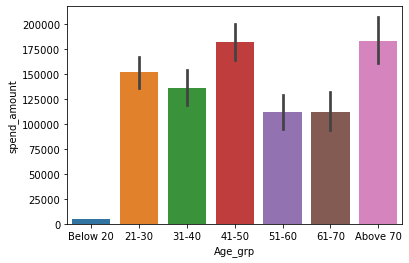

In [38]:
### PLOT Bar Chart Age group wise Spending

sns.barplot(data=cust_spend,x='Age_grp',y='spend_amount')
plt.show()

### What are the TOP 5 Products in terms of Spending

<AxesSubplot:xlabel='Type'>

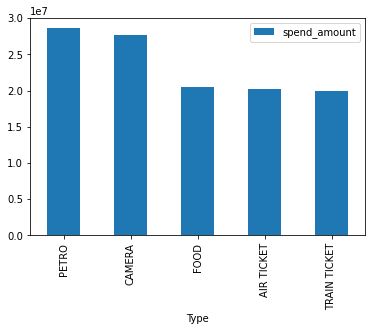

In [39]:
### Top Products Spending Amount Wise :

Top_products= cust_spend.pivot_table(index='Type',values='spend_amount',aggfunc='sum')
Top_products.sort_values(by=['spend_amount'],ascending= False).head(5).plot(kind='bar',y='spend_amount')

<AxesSubplot:xlabel='Type'>

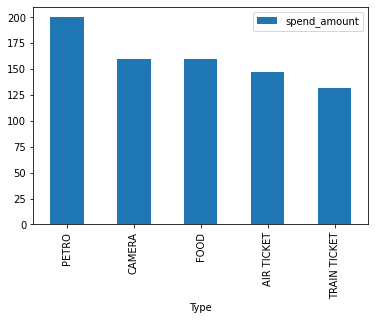

In [40]:
### Top Products Spending Count Wise :

Top_products= cust_spend.pivot_table(index='Type',values='spend_amount',aggfunc='count')
Top_products.sort_values(by=['spend_amount'],ascending= False).head(5).plot(kind='bar',y='spend_amount')

### City wise Spending

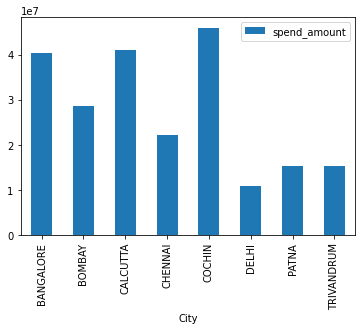

In [41]:
city_wise_spending= cust_spend.pivot_table(index='City',values= 'spend_amount',aggfunc='sum').plot(kind='bar')


### TOP 10 Customer in Terms of Repayment

In [42]:
Cust_wise_repay= repay_limit.pivot_table(index='Customer',values='Amount',aggfunc='sum').reset_index()
Cust_wise_repay.sort_values(by='Amount',inplace=True,ascending=False)
Cust_wise_repay.head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


### City wise Spend on yearly Basis

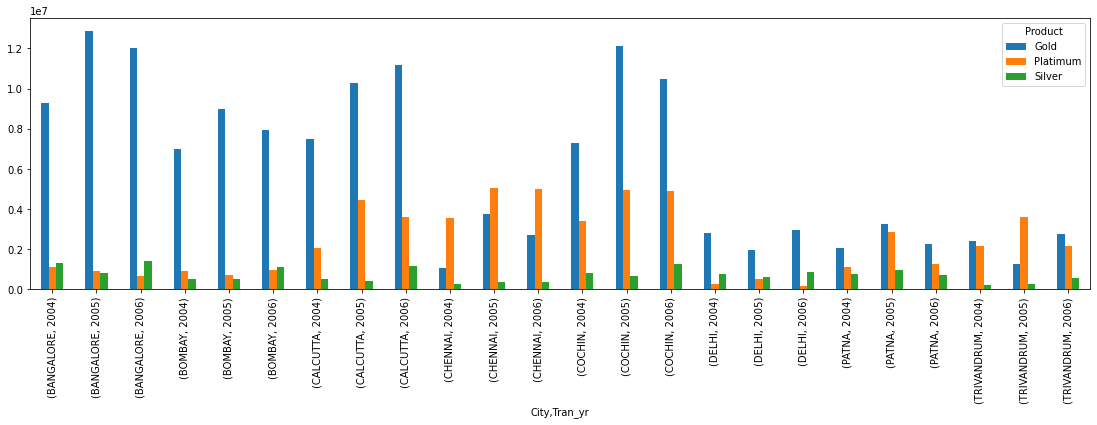

In [43]:
city_wise_spending= cust_spend.pivot_table(index=['City','Tran_yr'],columns='Product',values= 'spend_amount',aggfunc='sum').plot(kind='bar',figsize=(19,5))


### Monthly Comparison City Wise

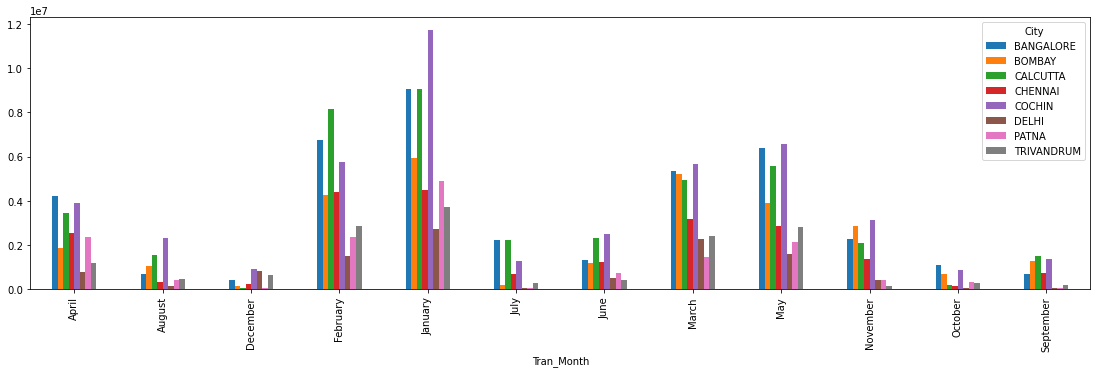

In [44]:
city_wise_monthly_spending= cust_spend.pivot_table(index='Tran_Month',columns= 'City',values= 'spend_amount',aggfunc='sum').plot(kind='bar',figsize=(19,5))


### Air Ticet Spend Analysis

<AxesSubplot:xlabel='Tran_yr'>

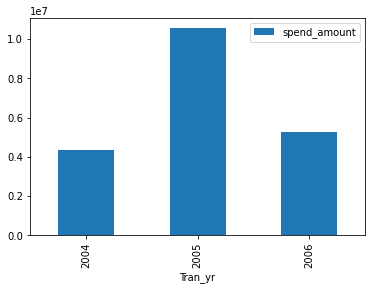

In [45]:
### Yearly Air Ticket Purchase Variation

AIR_TKT_spend =cust_spend.loc[cust_spend['Type']=='AIR TICKET']
AIR_TKT_spend.pivot_table(index=['Tran_yr'],values='spend_amount',aggfunc='sum').plot(kind='bar')

### Product Wise Monthy Spend- understand the seasonality

<AxesSubplot:xlabel='Tran_Month'>

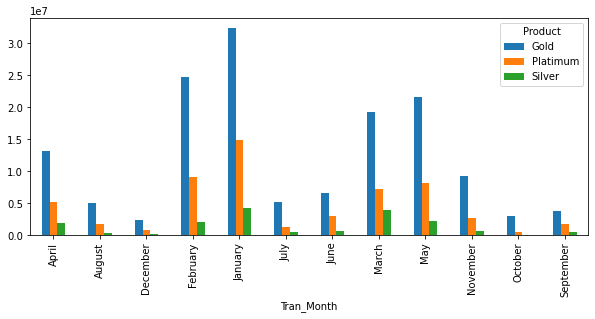

In [46]:
cust_spend.pivot_table(index=['Tran_Month'],columns= 'Product',values='spend_amount',aggfunc='sum').plot(kind='bar',figsize=(10,4))

In [47]:
repay_limit.head(5)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Pay_Month,Pay_Year
0,NaN,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,2.0,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
2,3.0,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
3,4.0,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
4,5.0,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2005


###  User defined function for the product & Year/month wise analysis of the repayment history. The function will ###  return TOP 10 Customer City wise/product wise/month wise. 

In [50]:

### Furnctionm for the output
def function (x,y):
    filtered_repay = repay_limit.loc[repay_limit['Product']== x]
    dff=filtered_repay.pivot_table(index=['City','Product','Customer'],columns=y,values='Amount',aggfunc='sum')
    return dff

## Blocks which will take user inputs -
i =input("Type the Product you want to Chosse- 'Gold' / 'Silver'/ 'Platinum'which product you want to analyse  ")
j = input( "Type the Time fiter you want analysie by  'Pay_Month' / 'Pay_Year' ")

function(i,j)





Type the Product you want to Chosse- 'Gold' / 'Silver'/ 'Platinum'which product you want to analyse  Gold
Type the Time fiter you want analysie by  'Pay_Month' / 'Pay_Year' Pay_Month


Pay_Month                         April     August   December    February  \
City       Product Customer                                                 
BANGALORE  Gold    A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
BOMBAY     Gold    A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
CALCUTTA   Gold    A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
CHENNAI    Gold    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
COCHIN     Gold    A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
DELHI      Gold    A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
PATNA      Gold    A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
TRIVANDRUM Gold    A28        115326.71  437823.07  451630.26   968709.79   

Pay_Month                       January        July       June       March  \
City       Product Customer                                                  
BANGALORE  Gold    A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
BOMBAY     Gold    A12       1220387.18  1201928.94  526225.8